In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
import folium

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
sns.set_style('darkgrid')

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Earthquakes%20in%20Greece%20(1901-2018)/Major%20EarthQuakes%20in%20Greece.csv")

In [6]:
data.head()

,Year,Month,Date,Hours,Minutes,LATATITUDE (N),LONGITUDE (E),MAGNITUDE (Richter)
0,1901,12,24,23,18,37.2,22.2,5.8
1,1901,9,12,6,15,39.0,22.2,5.6
2,1901,10,25,16,18,37.0,22.2,5.4
3,1902,7,5,14,56,40.8,23.2,6.6
4,1902,4,11,18,35,38.5,23.5,5.8


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 1173 non-null   int64  
 1   Month                1173 non-null   int64  
 2   Date                 1173 non-null   int64  
 3   Hours                1173 non-null   int64  
 4   Minutes              1173 non-null   int64  
 5   LATATITUDE (N)       1173 non-null   float64
 6   LONGITUDE  (E)       1173 non-null   float64
 7   MAGNITUDE (Richter)  1173 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 73.4 KB


In [8]:
data.describe()

,Year,Month,Date,Hours,Minutes,LATATITUDE (N),LONGITUDE (E),MAGNITUDE (Richter)
count,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000
mean,1957.324808,6.211424,16.029838,11.415175,28.545610,37.927391,23.839258,5.435294
std,30.903644,3.327100,8.605100,7.028271,16.917709,2.028572,2.954105,0.480275
min,1901.000000,1.000000,1.000000,0.000000,0.000000,33.520000,18.700000,5.000000
25%,1932.000000,3.000000,9.000000,5.000000,14.000000,36.270000,20.920000,5.100000
50%,1954.000000,6.000000,16.000000,11.000000,29.000000,38.000000,23.400000,5.300000
75%,1981.000000,9.000000,23.000000,17.000000,42.000000,39.310000,26.560000,5.600000
max,2017.000000,12.000000,31.000000,23.000000,59.000000,42.540000,30.130000,8.000000


In [9]:
data.columns

Index(['Year', 'Month', 'Date', 'Hours', 'Minutes', 'LATATITUDE (N)',
       'LONGITUDE  (E)', 'MAGNITUDE (Richter)'],
      dtype='object')

In [10]:
columns = ['Year', 'Month','Day','Hour', 'Minute', 'Latitude(N)','Longitude(E)','Magnitude(R)']
data.columns = columns

In [11]:
data.head()

,Year,Month,Day,Hour,Minute,Latitude(N),Longitude(E),Magnitude(R)
0,1901,12,24,23,18,37.2,22.2,5.8
1,1901,9,12,6,15,39.0,22.2,5.6
2,1901,10,25,16,18,37.0,22.2,5.4
3,1902,7,5,14,56,40.8,23.2,6.6
4,1902,4,11,18,35,38.5,23.5,5.8


In [12]:
data_0 = data[data['Magnitude(R)'] >= 1.0]
annual_nbr = data_0.groupby(by = 'Year').size()
print(annual_nbr)

Year
1901     3
1902     4
1903     7
1904    12
1905    13
        ..
2013     8
2014    13
2015     9
2016     8
2017    14
Length: 117, dtype: int64


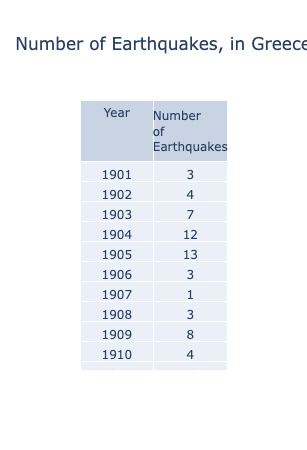

In [13]:
init_notebook_mode(connected = True)
cf.go_offline()
fig = go.Figure(data=[go.Table(header=dict(values=['Year', 'Number of Earthquakes']),
                 cells=dict(values=[annual_nbr.index, annual_nbr]))
                     ])
fig.update_layout(
    title="Number of Earthquakes, in Greece, per Year (1901 - 2018).")
fig.show()

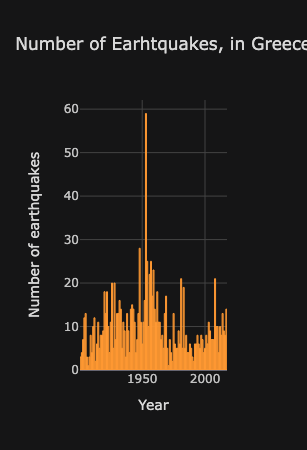

In [14]:
annual_nbr.iplot(kind = 'bar', theme = 'solar', 
                 title = 'Number of Earhtquakes, in Greece, per year (1901 - 2018)', 
                 xTitle = 'Year', yTitle = 'Number of earthquakes')

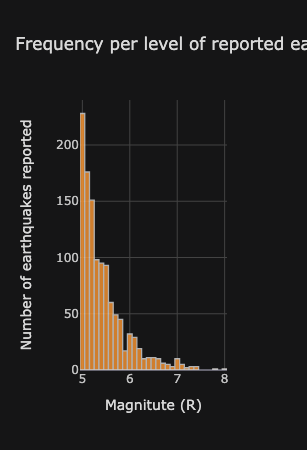

In [15]:
data_0['Magnitude(R)'].iplot(kind = 'histogram', theme = 'solar', 
                             title = 'Frequency per level of reported earthquake', 
                             xTitle = 'Magnitute (R)', 
                             yTitle = "Number of earthquakes reported")

In [16]:
severe_earth = data_0[data_0['Magnitude(R)'] >= 7.1]
severe_earth_0 = severe_earth.sort_values(by='Magnitude(R)', ascending = False)
severe_earth_0.head()

,Year,Month,Day,Hour,Minute,Latitude(N),Longitude(E),Magnitude(R)
7,1903,8,11,4,32,36.30,23.00,8.0
14,1904,4,4,10,25,41.80,23.10,7.8
26,1905,11,8,22,6,40.30,24.40,7.4
515,1953,3,18,19,6,40.20,27.52,7.4
609,1956,7,9,3,11,36.64,25.91,7.4


In [19]:
my_map = folium.Map(location=[severe_earth['Latitude(N)'].mean(), 
                    severe_earth['Longitude(E)'].mean()], zoom_start = 6, 
                    control_scale = True)

folium.Marker(
    location=[36.30, 23.00],
    popup="Monday, 11 August 1903 (04:32) ~ 8.0 R",
    icon=folium.Icon(icon="glyphicon glyphicon-star-empty", color= 'red')
).add_to(my_map)

folium.Marker(
    location=[41.8, 23.1],
    popup="Sunday, 4 April 1904 (10:25) ~ 7.8 R",
    icon=folium.Icon(icon="glyphicon glyphicon-star-empty", color= 'red')
).add_to(my_map)

folium.Marker(
    location=[40.3, 24.4],
    popup="Tuesday, 8 November 1905 (22:06) ~ 7.4 R",
    icon=folium.Icon(icon="glyphicon glyphicon-star-empty", color= 'red')
).add_to(my_map)

folium.Marker(
    location=[40.20, 27.52],
    popup="Wednesday, 18 March 1953 (19:06) ~ 7.4 R",
    icon=folium.Icon(icon="glyphicon glyphicon-star-empty", color= 'red')
).add_to(my_map)

folium.Marker(
    location=[36.64, 25.91],
    popup="Monday, 9 July 1956 (03:11) ~ 7.4 R",
    icon=folium.Icon(icon="glyphicon glyphicon-star-empty", color= 'red')
).add_to(my_map)

my_map

In [20]:
my_map_2 = folium.Map(location=[39.14, 42.65], zoom_start = 4, 
                    control_scale = True)

folium.Marker(
    location=[39.14, 42.65],
    popup="Monday, 28 April 1903 (01:30) ~ 8.0 R",
    icon=folium.Icon(icon="glyphicon glyphicon-star-empty", color= 'red')
).add_to(my_map_2)

my_map_2

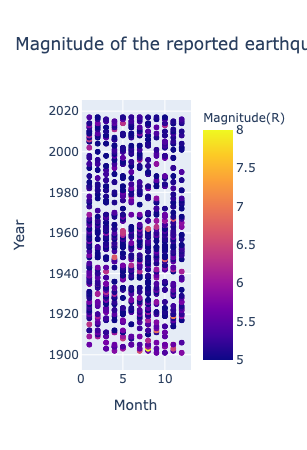

In [21]:
df = px.data.iris()

fig = px.scatter(data_0, x = 'Month', y = 'Year', color = 'Magnitude(R)', title = 'Magnitude of the reported earthquakes, by Month and by Year (1901 - 2018)' )

fig.show()